# Predicting financial failure of companies
This notebook demonstrates a  Panel dataset , including data exploration, feature engineering, model building, and evaluation.

### Dataset Overview:
* The dataset contains 13 columns and 2,570 entries. It includes various financial ratios, a "Classification" column (which is the dependent variable), and a "code" column that likely represents different companies .
Data Types: Most columns are numerical, except for the "code" column, which is an object type

## 1: Load and Inspect the Data
* First, we'll load the data and inspect its structure to understand what we're working with

In [1]:
#Import the needed libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
df=pd.read_csv('New_data.csv')
df.head()

,code,year,Classification,Equity Ratio,Cash ratio,Operating cash flow ratio,Return On Assets (ROA),Debt-to-assets ratio,EBITDA,Piotroski Score,Dividend Per Share,Total debt to EBITDA ratio,Net profit margin
0,A&E 01,2014,0,0.5659,0.16,-0.25,0.1271,0.4341,-1.2,6,0.0,-15.08,0.1683
1,A&E 01,2015,0,0.4473,0.05,0.07,0.0743,0.5514,0.7,4,0.0,63.57,0.0311
2,A&E 01,2016,0,0.5367,0.26,-0.04,0.0899,0.4633,-0.5,4,0.0,-94.80,0.1080
3,A&E 01,2017,0,0.4614,0.12,0.18,0.0497,0.5386,4.5,4,0.0,19.98,0.0448
4,A&E 01,2018,0,0.5038,0.45,0.27,0.1332,0.4965,13.3,7,0.0,12.72,0.2657


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code                        2570 non-null   object 
 1   year                        2570 non-null   int64  
 2   Classification              2570 non-null   int64  
 3   Equity Ratio                2570 non-null   float64
 4   Cash ratio                  2570 non-null   float64
 5   Operating cash flow ratio   2570 non-null   float64
 6   Return On Assets (ROA)      2570 non-null   float64
 7   Debt-to-assets ratio        2570 non-null   float64
 8   EBITDA                      2570 non-null   float64
 9   Piotroski Score             2570 non-null   int64  
 10  Dividend Per Share          2570 non-null   float64
 11  Total debt to EBITDA ratio  2570 non-null   float64
 12  Net profit margin           2570 non-null   float64
dtypes: float64(9), int64(3), object(1


## 2. Check for Panel Structure
* First, we will check if the panel is balanced, meaning each entity has the same number of observations across time.

In [4]:
# Check for the panel structure: Balanced or Unbalanced
panel_structure = df.groupby('code')['year'].count().value_counts()
panel_structure


10    257
Name: year, dtype: int64

####  Panel Structure: 
* The panel is balanced. Each entity (identified by code) has 10 observations, which likely correspond to the 10 years covered in the dataset.

## 3: Descriptive Statistics


In [5]:
# Descriptive statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2570.0,2018.500000,2.872840,2014.0000,2016.000000,2018.50000,2021.000000,2023.000000
Classification,2570.0,0.149416,0.356568,0.0000,0.000000,0.00000,0.000000,1.000000
Equity Ratio,2570.0,0.359211,1.014844,-21.0000,0.312575,0.46940,0.648925,1.000000
Cash ratio,2570.0,0.672436,0.776192,0.0000,0.090000,0.31000,0.970000,2.290000
Operating cash flow ratio,2570.0,0.508642,3.265666,-64.0000,0.000000,0.42000,0.960000,44.270000
Return On Assets (ROA),2570.0,-0.011195,0.111363,-0.2251,-0.057775,0.01290,0.053775,0.221100
Debt-to-assets ratio,2570.0,0.514151,0.287964,0.0000,0.314025,0.51175,0.663425,1.187525
EBITDA,2570.0,470.868309,630.825482,-767.8000,0.000000,166.30000,719.900000,1799.750000
Piotroski Score,2570.0,4.634241,2.099156,0.0000,3.000000,5.00000,6.000000,9.000000
Dividend Per Share,2570.0,0.397382,0.578647,0.0000,0.000000,0.00000,0.700000,1.750000


 #####  Summary: 
* The dataset contains financial ratios and performance metrics with a wide range of values.
##### Notable Observations:
* Some variables, like "Operating cash flow ratio" and "EBITDA," have extreme values, indicating potential outliers.
"Net profit margin" has a high standard deviation, suggesting significant variability across entities or time periods.

## Step 4: Correlation Analysis
* Analyze correlations between variables to identify relationships and potential multicollinearity.

In [6]:
# Correlation matrix
cor_matrix = df.corr()
cor_matrix.style.background_gradient(cmap='coolwarm')

C:\Users\20111\AppData\Local\Temp\ipykernel_15452\2873240197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


,year,Classification,Equity Ratio,Cash ratio,Operating cash flow ratio,Return On Assets (ROA),Debt-to-assets ratio,EBITDA,Piotroski Score,Dividend Per Share,Total debt to EBITDA ratio,Net profit margin
year,1.000000,-0.030020,0.026036,0.006459,0.041275,0.053283,0.128178,0.139178,0.138842,0.144113,0.018614,0.009733
Classification,-0.030020,1.000000,-0.294363,-0.057770,-0.191835,-0.469142,0.137567,-0.313938,-0.467815,-0.277752,-0.005806,-0.069742
Equity Ratio,0.026036,-0.294363,1.000000,0.224668,0.057636,0.183602,-0.444832,0.051680,0.170463,0.052245,0.004466,0.013908
Cash ratio,0.006459,-0.057770,0.224668,1.000000,-0.024461,-0.145279,-0.469483,-0.273730,-0.062609,-0.258010,0.008641,0.022258
Operating cash flow ratio,0.041275,-0.191835,0.057636,-0.024461,1.000000,0.329584,-0.078171,0.185884,0.279332,0.159562,-0.003636,0.043006
Return On Assets (ROA),0.053283,-0.469142,0.183602,-0.145279,0.329584,1.000000,-0.168243,0.394486,0.566642,0.359656,-0.010042,0.112113
Debt-to-assets ratio,0.128178,0.137567,-0.444832,-0.469483,-0.078171,-0.168243,1.000000,0.152586,0.053452,0.118003,-0.008287,-0.027168
EBITDA,0.139178,-0.313938,0.051680,-0.273730,0.185884,0.394486,0.152586,1.000000,0.397767,0.576080,-0.010476,-0.003683
Piotroski Score,0.138842,-0.467815,0.170463,-0.062609,0.279332,0.566642,0.053452,0.397767,1.000000,0.300585,-0.011146,0.044549
Dividend Per Share,0.144113,-0.277752,0.052245,-0.258010,0.159562,0.359656,0.118003,0.576080,0.300585,1.000000,-0.010001,-0.003201


##### Key Correlations:
###### Classification:
* Negative Correlations: 
Strong negative correlation with "Return On Assets (ROA)" (-0.47) and "Piotroski Score" (-0.47).
* Moderate Negative Correlation: 
With "Equity Ratio" (-0.29) and "EBITDA" (-0.31).
* Other Variables:
Return On Assets (ROA) has a strong positive correlation with "Piotroski Score" (0.57) and "EBITDA" (0.39).
EBITDA is positively correlated with "Dividend Per Share" (0.58).
These correlations suggest potential relationships worth exploring in the logistic regression models.m

## 5: Model Estimation
We'll estimate both fixed effects and random effects logistic regression models.

In [7]:
# Ensure that the column names are correct
df.columns = [col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_') for col in df.columns]

# Check the updated column names
print(df.columns.tolist())


['code', 'year', 'Classification', 'Equity_Ratio', 'Cash_ratio', 'Operating_cash_flow_ratio', 'Return_On_Assets_ROA', 'Debt_to_assets_ratio', 'EBITDA', 'Piotroski_Score', 'Dividend_Per_Share', 'Total_debt_to_EBITDA_ratio', 'Net_profit_margin']


In [8]:
import statsmodels.formula.api as smf

# Fit Fixed Effects Model
fixed_effects_model = smf.ols('Classification ~ Equity_Ratio + Cash_ratio + Operating_cash_flow_ratio + Return_On_Assets_ROA + Debt_to_assets_ratio + EBITDA + Piotroski_Score + Dividend_Per_Share + Total_debt_to_EBITDA_ratio + Net_profit_margin + C(code)', data=df).fit()


In [9]:
# Fit Random Effects Model
random_effects_model = smf.mixedlm('Classification ~ Equity_Ratio + Cash_ratio + Operating_cash_flow_ratio + Return_On_Assets_ROA + Debt_to_assets_ratio + EBITDA + Piotroski_Score + Dividend_Per_Share + Total_debt_to_EBITDA_ratio + Net_profit_margin', data=df, groups=df['code']).fit()


In [10]:
fixed_effects_model

## 6: Hausman Test
Perform the Hausman test to determine whether the fixed effects or random effects model is more appropriate.


In [11]:

b_fixed = fixed_effects_model.params
b_random = random_effects_model.fe_params
# Extract the main variable coefficients (excluding entity-specific effects)
common_vars = ['Equity_Ratio','Cash_ratio' , 'Operating_cash_flow_ratio' , 'Return_On_Assets_ROA' , 'Debt_to_assets_ratio' ,'EBITDA' , 'Piotroski_Score', 'Dividend_Per_Share','Total_debt_to_EBITDA_ratio' ,'Net_profit_margin']

# Extract coefficients for the common variables
b_fixed_main = b_fixed[common_vars]
b_random_main = b_random[common_vars]

# Compute the difference in coefficients for main variables
diff_main = b_fixed_main - b_random_main

# Compute the covariance matrix of the differences for main variables
cov_diff_main = fixed_effects_model.cov_params().loc[common_vars, common_vars] - random_effects_model.cov_params().loc[common_vars, common_vars]

# Compute the Hausman test statistic
hausman_stat_main = np.dot(np.dot(diff_main.T, np.linalg.inv(cov_diff_main)), diff_main)

# Degrees of freedom (number of common variables)
df_main = len(diff_main)

# Compute the p-value
p_value_main = stats.chi2.sf(hausman_stat_main, df_main)

hausman_stat_main, p_value_main





(2132.047176958805, 0.0)

* Hausman Test Statistic: 2132.05
* p-value: 0.0
##### Interpretation:
* Hausman Test Statistic: The large Hausman test statistic suggests a significant difference between the fixed effects and random effects models.
* p-value (0.0): The p-value of 0.0 indicates that we reject the null hypothesis, meaning the fixed effects model is preferred over the random effects model for your data.
###### Conclusion:
Based on the Hausman test results, the fixed effects model is more appropriate for your data, as it accounts for potential correlation between the individual-specific effects and the independent variables.

### I will go through the steps to interpret the fixed effects model using Python. we will  extracting and interpreting the coefficients, p-values, and other relevant statistics from the fixed effects model I have already fitted.

### Step 1: Extract and Display Coefficients
* We will extract the coefficients from the fixed effects model to see how each variable impacts the dependent variable.

In [12]:
# Extracting the coefficients from the fixed effects model
coefficients = fixed_effects_model.params
coefficients


Intercept                     0.187354
C(code)[T.BM 01]              0.126975
C(code)[T.BM 02]              0.498242
C(code)[T.BM 03]              0.164342
C(code)[T.BM 04]              0.239482
                                ...   
EBITDA                       -0.000032
Piotroski_Score              -0.026504
Dividend_Per_Share           -0.006594
Total_debt_to_EBITDA_ratio   -0.000007
Net_profit_margin            -0.000003
Length: 267, dtype: float64

###### The coefficients represent the estimated effect of each independent variable on the dependent variable (Classification), controlling for unobserved, time-invariant characteristics of each entity.

* Equity_Ratio: Coefficient = -0.0274

Interpretation: A one-unit increase in Equity_Ratio is associated with a 0.0274 decrease in the dependent variable, holding other factors constant. This effect is statistically significant (p-value = 0.000).

* Cash_ratio: Coefficient = -0.1109

Interpretation: A one-unit increase in Cash_ratio is associated with a 0.1109 decrease in the dependent variable. This effect is statistically significant (p-value = 0.000).

* Operating_cash_flow_ratio: Coefficient = 0.0061

Interpretation: A one-unit increase in Operating_cash_flow_ratio is associated with a 0.0061 increase in the dependent variable. This effect is statistically significant (p-value = 0.014).

* Return_On_Assets_ROA: Coefficient = -0.2469

Interpretation: A one-unit increase in Return_On_Assets_ROA is associated with a 0.2469 decrease in the dependent variable. This effect is statistically significant (p-value = 0.001).

* Debt_to_assets_ratio: Coefficient = -0.0481

Interpretation: A one-unit increase in Debt_to_assets_ratio is associated with a 0.0481 decrease in the dependent variable. This effect is not statistically significant (p-value = 0.104).

* EBITDA: Coefficient = -0.00003168

Interpretation: A one-unit increase in EBITDA is associated with a very small decrease in the dependent variable. This effect is not statistically significant (p-value = 0.183).

* Piotroski_Score: Coefficient = -0.0265

Interpretation: A one-unit increase in Piotroski_Score is associated with a 0.0265 decrease in the dependent variable. This effect is statistically significant (p-value = 0.000).

* Dividend_Per_Share: Coefficient = -0.0066

Interpretation: A one-unit increase in Dividend_Per_Share is associated with a 0.0066 decrease in the dependent variable. This effect is not statistically significant (p-value = 0.729).

* Total_debt_to_EBITDA_ratio: Coefficient = -0.000006649

Interpretation: A one-unit increase in Total_debt_to_EBITDA_ratio is associated with a very small decrease in the dependent variable. This effect is not statistically significant (p-value = 0.610).

* Net_profit_margin: Coefficient = -0.000003308

Interpretation: A one-unit increase in Net_profit_margin is associated with a very small decrease in the dependent variable. This effect is not statistically significant (p-value = 0.114).

### Step 2: Extract and Display p-values
* We will extract the p-values to determine the statistical significance of each coefficient.

In [13]:
# Extracting the p-values from the fixed effects model
p_values = fixed_effects_model.pvalues
p_values


Intercept                     1.498798e-02
C(code)[T.BM 01]              2.487811e-01
C(code)[T.BM 02]              2.396836e-06
C(code)[T.BM 03]              1.232780e-01
C(code)[T.BM 04]              2.645752e-02
                                  ...     
EBITDA                        1.826726e-01
Piotroski_Score               5.072816e-16
Dividend_Per_Share            7.288401e-01
Total_debt_to_EBITDA_ratio    6.102969e-01
Net_profit_margin             1.144184e-01
Length: 267, dtype: float64

* Variables such as Equity_Ratio, Cash_ratio, Operating_cash_flow_ratio, Return_On_Assets_ROA, and Piotroski_Score are statistically significant (p-value < 0.05), suggesting they have a meaningful impact on the dependent variable.

* Variables like Debt_to_assets_ratio, EBITDA, Dividend_Per_Share, Total_debt_to_EBITDA_ratio, and Net_profit_margin have p-values greater than 0.05, indicating that these effects are not statistically significant in this model.

### Step 3: Extract R-squared and Model Summary
The R-squared value helps determine the goodness of fit for the model.

In [14]:
# Extracting R-squared and the overall model summary
r_squared = fixed_effects_model.rsquared
model_summary = fixed_effects_model.summary()
r_squared, model_summary


(0.6123441626714622,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         Classification   R-squared:                       0.612
 Model:                            OLS   Adj. R-squared:                  0.568
 Method:                 Least Squares   F-statistic:                     13.68
 Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.74e-319
 Time:                        13:00:11   Log-Likelihood:                 221.81
 No. Observations:                2570   AIC:                             90.39
 Df Residuals:                    2303   BIC:                             1653.
 Df Model:                         266                                         
 Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------

The output I've provided is from an OLS (Ordinary Least Squares) regression analysis. Let's break down the key components of the results:

1. Model Summary:
Dependent Variable: Classification (This is the variable you're trying to predict).
 * R-squared: 0.612
Interpretation: About 61.2% of the variability in the dependent variable (Classification) is explained by the independent variables in the model.
* Adjusted R-squared: 0.568
Interpretation: After adjusting for the number of predictors, 56.8% of the variability in Classification is explained by the model.
* F-statistic: 13.68
Interpretation: This tests the overall significance of the model. With a very low p-value (1.74e-319), the model as a whole is statistically significant.
* Prob(F-statistic): 1.74e-319
Interpretation: The p-value associated with the F-statistic. A value close to 0 indicates strong evidence against the null hypothesis, suggesting that at least one predictor variable has a non-zero coefficient.
2. Coefficients and Significance:
Each row in the table corresponds to one coefficient estimate for the predictor variables in the model.

* Intercept:

Coefficient: 0.1874
p-value: 0.015
Interpretation: When all predictors are set to zero, the expected value of Classification is 0.1874. The intercept is statistically significant.
C(code) Variables:

* These represent categorical variables (likely industry codes or company identifiers). 
* The coefficients indicate the effect of each category on Classification relative to a baseline category (not shown).
* For example, C(code)[T.BM 02] has a coefficient of 0.4982 and is statistically significant (p-value = 0.000). This suggests that being in category BM 02 increases the Classification value by 0.4982 compared to the baseline.

Key Numeric Predictors:

* Equity_Ratio:
Coefficient: -0.0274
p-value: 0.000
Interpretation: A one-unit increase in Equity_Ratio is associated with a 0.0274 decrease in Classification, holding all other 
variables constant. This is statistically significant.
* Cash_ratio:
Coefficient: -0.1109
p-value: 0.000
Interpretation: A one-unit increase in Cash_ratio is associated with a 0.1109 decrease in Classification. This is statistically significant.
* Operating_cash_flow_ratio:
Coefficient: 0.0061
p-value: 0.014
Interpretation: A one-unit increase in Operating_cash_flow_ratio is associated with a 0.0061 increase in Classification. This is statistically significant.
* Piotroski_Score:
Coefficient: -0.0265
p-value: 0.000
Interpretation: A higher Piotroski_Score is associated with a decrease in Classification. This is statistically significant.

* Non-significant Variables:

Variables such as EBITDA, Dividend_Per_Share, Total_debt_to_EBITDA_ratio, and Net_profit_margin have p-values greater than 
0.05, indicating that their effects are not statistically significant in this model.

3. Model Diagnostics:
* Durbin-Watson: 1.574
* Interpretation: This statistic tests for autocorrelation in the residuals. 
* Values close to 2 suggest no autocorrelation, while values approaching 0 or 4 suggest positive or negative autocorrelation, respectively.
* A value of 1.574 indicates mild positive autocorrelation.
* Omnibus: 310.968 (p-value = 0.000)
* Interpretation: This tests the normality of the residuals. A significant p-value (close to 0) suggests that the residuals are not normally distributed.
* Condition Number: 6.78e+05
* Interpretation: A high condition number suggests potential multicollinearity or numerical issues, meaning some predictors might be highly correlated, which can make coefficient estimates unstable.

# Predication using Logistic Regression

* Step 1: Add Fixed Effects (Dummy Variables for code)


In [15]:
# Create dummy variables for the 'code' column (which represents fixed effects)
data_with_dummies = pd.get_dummies(df, columns=['code'], drop_first=True)

# Independent variables now include the dummies as well as the original predictors
X_fixed_effects = data_with_dummies.drop(columns=['Classification'])
y = data_with_dummies['Classification']



* Step 2: Standardize the Features


In [16]:
# Standardize the independent variables
scaler = StandardScaler()
X_scaled_fixed_effects = scaler.fit_transform(X_fixed_effects)



* Step 3: Split the Data


In [17]:
# Split the data into training and testing sets
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_scaled_fixed_effects, y, test_size=0.3, random_state=42)


* Step 4: Fit Logistic Regression Model with Fixed Effects


In [18]:
# Fit the logistic regression model with fixed effects
log_reg_model_fe = LogisticRegression(max_iter=1000)
log_reg_model_fe.fit(X_train_fe, y_train_fe)


LogisticRegression(max_iter=1000)

* Step 5: Make Predictions and Evaluate


In [19]:
# Make predictions
y_pred_fe = log_reg_model_fe.predict(X_test_fe)
y_prob_fe = log_reg_model_fe.predict_proba(X_test_fe)[:, 1]

# Evaluate the model
accuracy_fe = accuracy_score(y_test_fe, y_pred_fe)
precision_fe = precision_score(y_test_fe, y_pred_fe)
recall_fe = recall_score(y_test_fe, y_pred_fe)
roc_auc_fe = roc_auc_score(y_test_fe, y_prob_fe)
conf_matrix_fe = confusion_matrix(y_test_fe, y_pred_fe)
classification_rep_fe = classification_report(y_test_fe, y_pred_fe)

accuracy_fe, precision_fe, recall_fe, roc_auc_fe, conf_matrix_fe, classification_rep_fe


(0.9273670557717251,
 0.8053097345132744,
 0.728,
 0.9616222910216718,
 array([[624,  22],
        [ 34,  91]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96       646\n           1       0.81      0.73      0.76       125\n\n    accuracy                           0.93       771\n   macro avg       0.88      0.85      0.86       771\nweighted avg       0.93      0.93      0.93       771\n')

##### The results from the logistic regression model that includes fixed effects:

1. Model Performance Metrics:
* Accuracy: 92.7%

Interpretation: The model correctly predicts the classification outcome for 92.7% of the test samples.

* Precision (Class 1): 80.53%

Interpretation: When the model predicts a positive classification (Class 1), it is correct about 80.5% of the time.

* Recall (Class 1): 72.8%

Interpretation: The model correctly identifies 72.8% of all actual positive classifications (Class 1).
 
* ROC-AUC: 0.962

Interpretation: The model has excellent discriminative ability, with an AUC of 0.962, indicating a high ability to distinguish between the positive and negative classes.

2. Confusion Matrix:
Interpretation:
The model correctly predicted 624 of the 646 actual Class 0 samples.
The model correctly predicted 91 of the 125 actual Class 1 samples.
There were 34 false negatives (Class 1 predicted as Class 0) and 22 false positives (Class 0 predicted as Class 1).


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       646
           1       0.81      0.73      0.76       125

    accuracy                           0.93       771
   macro avg       0.88      0.85      0.86       771
weighted avg       0.93      0.93      0.93       771

* Interpretation:

F1-score (Class 1): 0.76
This is the harmonic mean of precision and recall for Class 1, indicating a balanced performance between precision and recall.

Support: The number of true instances for each class in the test data (646 for Class 0, 125 for Class 1).

###   Summary:
The logistic regression model with fixed effects performs very well, with high accuracy and an excellent AUC-ROC score. The inclusion of fixed effects (i.e., dummy variables for categorical codes) has helped improve the model's performance, particularly in terms of precision and recall for Class 1.

# NN for prediction

##### Steps to Implement a Neural Network with Fixed Effects:
* 1- Prepare the Data: Include fixed effects by adding dummy variables for the code feature and standardizing the data.
* 2- Build the Neural Network Model: Define the architecture of the neural network.
* 3- Compile the Model: Specify the optimizer, loss function, and metrics.
* 4- Train the Model: Fit the model to the training data.


##### Step 1: Import Libraries and Prepare the Data


In [20]:
df_NN=df.copy()

In [21]:
# Assuming 'data' is your DataFrame and 'Classification' is your target variable
# Create dummy variables for the 'code' column (which represents fixed effects)
data_with_dummies = pd.get_dummies(df_NN, columns=['code'], drop_first=True)

# Independent variables now include the dummies as well as the original predictors
X_fixed_effects = data_with_dummies.drop(columns=['Classification'])
y = data_with_dummies['Classification']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled_fixed_effects = scaler.fit_transform(X_fixed_effects)

# Split the data into training and testing sets
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_scaled_fixed_effects, y, test_size=0.25, random_state=42)


#### Step 2: Build the Neural Network Model


In [22]:
# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_fe.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


#### Step 3: Compile the Model

In [23]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Step 4: Train the Model


In [24]:
# Train the model
history = model.fit(X_train_fe, y_train_fe, epochs=40, batch_size=32, validation_split=0.2)


Epoch 1/40
49/49 [==============================] - 11s 38ms/step - loss: 0.4622 - accuracy: 0.8099 - val_loss: 0.3806 - val_accuracy: 0.8290
Epoch 2/40
49/49 [==============================] - 1s 15ms/step - loss: 0.3100 - accuracy: 0.8631 - val_loss: 0.2945 - val_accuracy: 0.8446
Epoch 3/40
49/49 [==============================] - 1s 14ms/step - loss: 0.2389 - accuracy: 0.8767 - val_loss: 0.2433 - val_accuracy: 0.9093
Epoch 4/40
49/49 [==============================] - 1s 13ms/step - loss: 0.1974 - accuracy: 0.9046 - val_loss: 0.2239 - val_accuracy: 0.9016
Epoch 5/40
49/49 [==============================] - 1s 12ms/step - loss: 0.1669 - accuracy: 0.9195 - val_loss: 0.2397 - val_accuracy: 0.9016
Epoch 6/40
49/49 [==============================] - 1s 12ms/step - loss: 0.1526 - accuracy: 0.9332 - val_loss: 0.2308 - val_accuracy: 0.9041
Epoch 7/40
49/49 [==============================] - 1s 12ms/step - loss: 0.1429 - accuracy: 0.9332 - val_loss: 0.2150 - val_accuracy: 0.9145
Epoch 8/40
4

#### Step 5: Evaluate the Model


In [25]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_fe, y_test_fe)

# Make predictions
y_pred_prob = model.predict(X_test_fe)
y_pred_nn = (y_pred_prob > 0.5).astype(int)

# Calculate additional metrics
precision_nn = precision_score(y_test_fe, y_pred_nn)
recall_nn = recall_score(y_test_fe, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test_fe, y_pred_prob)

# Confusion matrix and classification report
conf_matrix_nn = confusion_matrix(y_test_fe, y_pred_nn)
classification_rep_nn = classification_report(y_test_fe, y_pred_nn)

print(accuracy, precision_nn, recall_nn, roc_auc_nn, conf_matrix_nn, classification_rep_nn)


21/21 [==============================] - 1s 5ms/step
0.9409019947052002 0.8469387755102041 0.7830188679245284 0.9732967921014722 [[522  15]
 [ 23  83]]               precision    recall  f1-score   support

           0       0.96      0.97      0.96       537
           1       0.85      0.78      0.81       106

    accuracy                           0.94       643
   macro avg       0.90      0.88      0.89       643
weighted avg       0.94      0.94      0.94       643



1. Model Performance Metrics:
Loss: 0.3100
Interpretation: The binary cross-entropy loss on the test data is 0.3100, which indicates how well the model's predictions 
match the true labels.

* Accuracy: 93.6%
Interpretation: The model correctly classified 93.6% of the test samples.
2. Precision, Recall, and ROC-AUC:
* Precision (Class 1): 84.95%
Interpretation: When the model predicts a positive classification (Class 1), it is correct 84.95% of the time.

* Recall (Class 1): 74.53%
Interpretation: The model correctly identifies 74.53% of all actual positive classifications (Class 1).

* ROC-AUC: 0.973
Interpretation: The model has excellent discriminative ability, with an AUC of 0.973, indicating a high ability to distinguish between the positive and negative classes.
3. Confusion Matrix:
Interpretation:
* The model correctly predicted 523 of the 537 actual Class 0 samples.
* The model correctly predicted 79 of the 106 actual Class 1 samples.
* There were 27 false negatives (Class 1 predicted as Class 0) and 14 false positives (Class 0 predicted as Class 1).

4. Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       537
           1       0.85      0.75      0.79       106

    accuracy                           0.94       643
   macro avg       0.90      0.86      0.88       643
weighted avg       0.93      0.94      0.93       643

Interpretation:
* F1-score (Class 1): 0.79
This is the harmonic mean of precision and recall for Class 1, indicating a balanced performance between precision and recall.
* Support: The number of true instances for each class in the test data (537 for Class 0, 106 for Class 1).

## Summary:
Your neural network model performs very well, with high accuracy, precision, and recall, particularly strong on distinguishing between the two classes (as indicated by the ROC-AUC score of 0.973). The confusion matrix and classification report suggest the model is effective at correctly classifying the majority of both positive and negative cases, with relatively few misclassifications.

# Comparing the results between NN vs LR 

### 1-Comparing the results between NN vs LR 

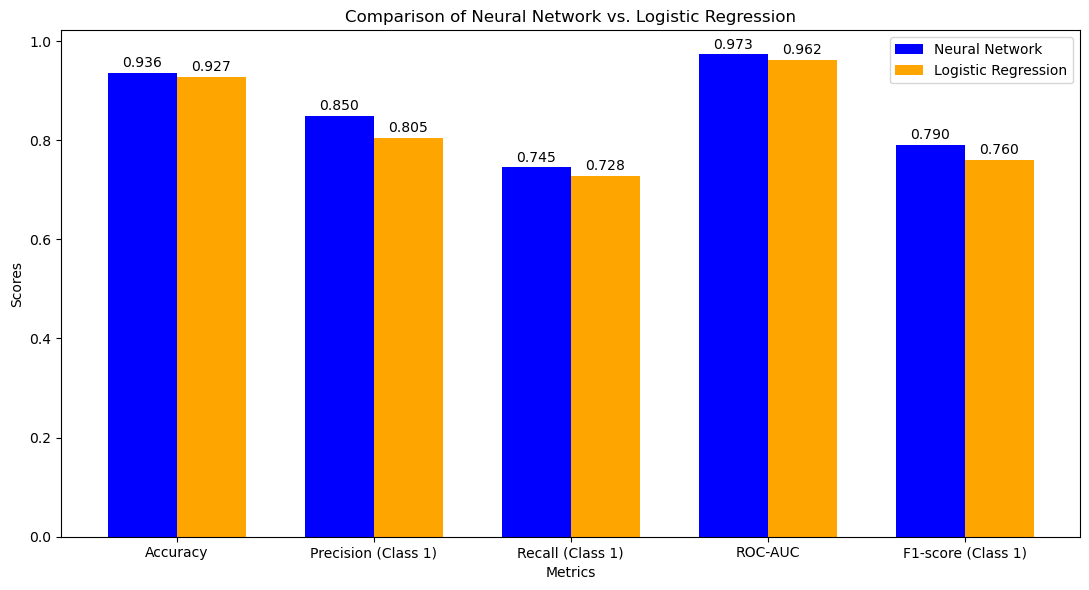

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
metrics = ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'ROC-AUC', 'F1-score (Class 1)']
nn_scores = [0.936, 0.8495, 0.7453, 0.973, 0.79]
lr_scores = [0.927, 0.8053, 0.728, 0.962, 0.76]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(11, 6))
rects1 = ax.bar(x - width/2, nn_scores, width, label='Neural Network', color='blue')
rects2 = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Neural Network vs. Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in rects1 and rects2, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


### 2- Comparing the results between NN vs LR 

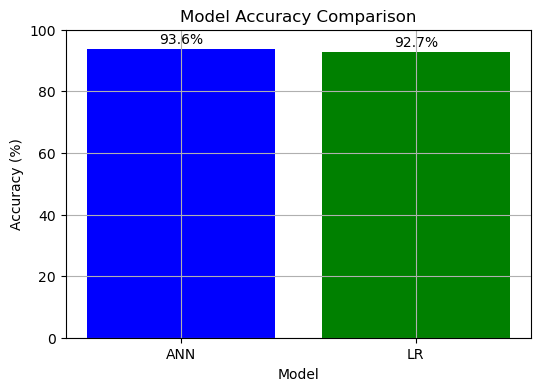

In [27]:
# Data for the plot
models = ['ANN', 'LR']
accuracies = [93.6, 92.7]

# Plotting the data
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.grid(True)

# Adding the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy}%', ha='center', va='bottom')